# Аттрактор Лоренца

##  Задача №1. Простое решение

<br>
<font size=4> 
Система
</font>
<br>
<br>
$
\Large
\begin{cases}
   \dot{x} = \sigma (y - x), 
   \\
   \dot{y} = x (\rho - z) - y,
   \\
   \dot{z} = x y - \beta z
 \end{cases}\normalsize
 $
<br>
<font size=4> 
Стандартные значения - $\sigma=10, \rho=28, \beta=2.667$
</font>
<br>

__Требования__:
- Не использовать интеграторы и массивы numpy, точки высчитывать в цикле
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Подписать рисунок и оси
- label со значениями $\sigma=10, \rho=28, \beta=2.667$


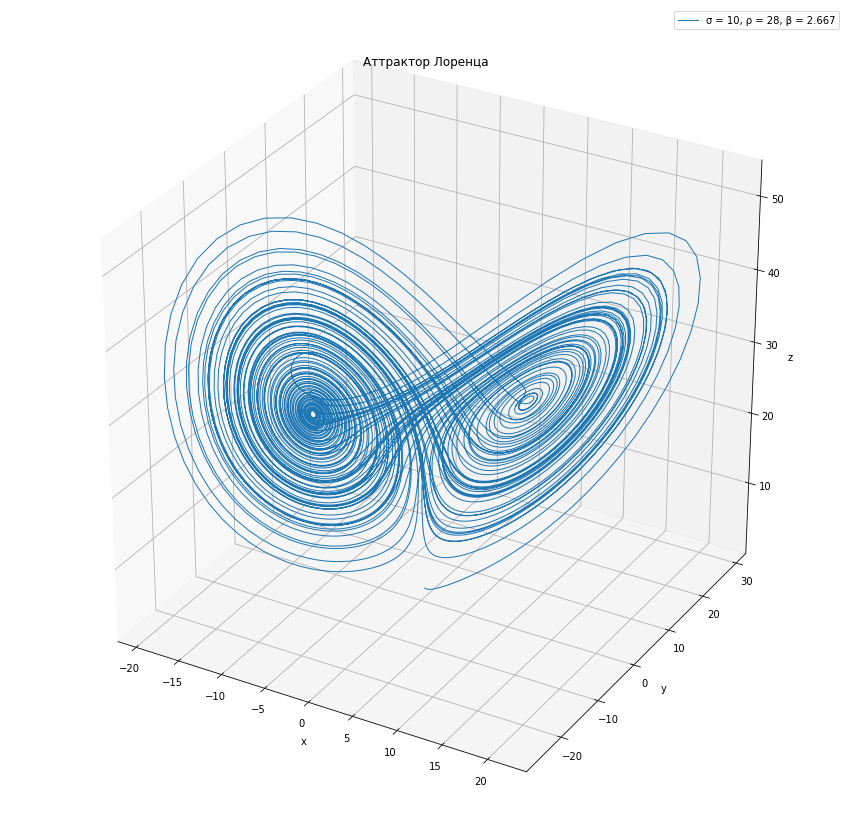

In [6]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

sigma = 10
rho = 28
beta = 2.667
steps = 10 ** 4
dt = 0.01

def lorenz(x, y, z):
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

x = [0.]
y = [1.]
z = [1.01]

for i in range(steps):
    x1, y1, z1 = lorenz(x[i], y[i], z[i])
    x.append(x[i] + x1 * dt)
    y.append(y[i] + y1 * dt)
    z.append(z[i] + z1 * dt)
    
fig = matplotlib.pyplot.figure(figsize = (15, 15))
plot = fig.gca(projection = '3d')

plot.plot(x, y, z, lw = 1)
plot.set_title("Аттрактор Лоренца")
plot.legend(['\u03C3 = 10, \u03C1 = 28, \u03B2 = 2.667'])
plot.set_xlabel("x")
plot.set_ylabel("y")
plot.set_zlabel("z")

matplotlib.pyplot.show();


##  Задача №2. Чуть сложнее

Аттрактор Лоренца, но другие требования:

- Использовать numpy массивы, не использовать интегрирование из scipy
- Начальные данные - $(0., 1., 1.01)$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем
    - `lorenz(x, y, z)` считает производные при стандартных значениях $\sigma=10, \rho=28, \beta=2.667$
    - если нужны другие значения $\sigma, \rho, \beta$, то вызывать можно только как `lorenz(x, y, z, sigma=..., beta=..., rho=...)`
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

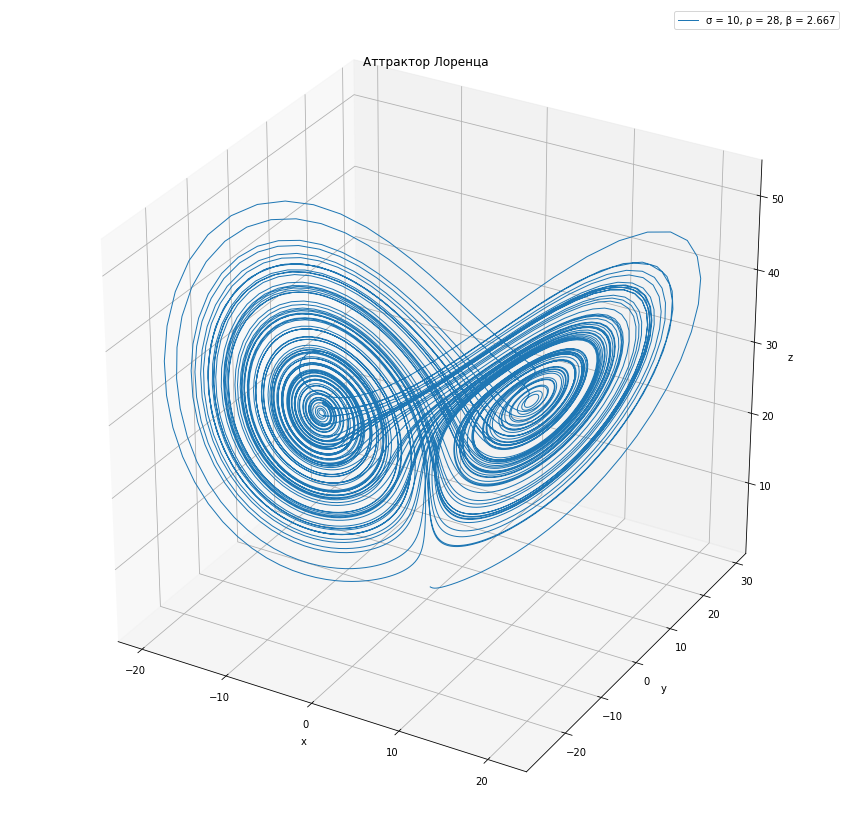

In [7]:
import numpy as np

steps = 10 ** 4
dt = 0.01

sigma = 10
rho = 28
beta = 2.667

def lorenz(x, y, z):
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

x = np.empty(steps + 1)
y = np.empty(steps + 1)
z = np.empty(steps + 1)
x[0], y[0], z[0] = (0., 1., 1.05)

for i in range(steps):
    x1, y1, z1 = lorenz(x[i], y[i], z[i])
    x[i + 1] = x[i] + (x1 * dt)
    y[i + 1] = y[i] + (y1 * dt)
    z[i + 1] = z[i] + (z1 * dt)
    
fig = matplotlib.pyplot.figure(figsize = (15, 15))
plot = fig.gca(projection = '3d')

plot.plot(x, y, z, lw = 1)
plot.set_title("Аттрактор Лоренца")
plot.legend(['\u03C3 = 10, \u03C1 = 28, \u03B2 = 2.667'])
plot.set_xlabel("x")
plot.set_ylabel("y")
plot.set_zlabel("z")

matplotlib.pyplot.show();

##  Задача №3. Сложнее, но короче

Аттрактор Лоренца, но требования опять поменялись:

- Использовать numpy массивы и интегрирование из scipy (odeint)
- Начальные данные - $(0., 1., 1.01)$
- Временной интервал - $0...100$
- Количество точек - $10^4$
- Для вычисления очередной точки использовать специальную функцию `lorenz(...)`, причем первый аргумент - кортеж из трех точек; остальное - как в _задаче №2_ (может что-то ещё понадобится, посмотрите сигнатуру `odeint`)
- Подписать рисунок и оси
- label со значениями $\sigma, \rho, \beta$, для которых построена фигура

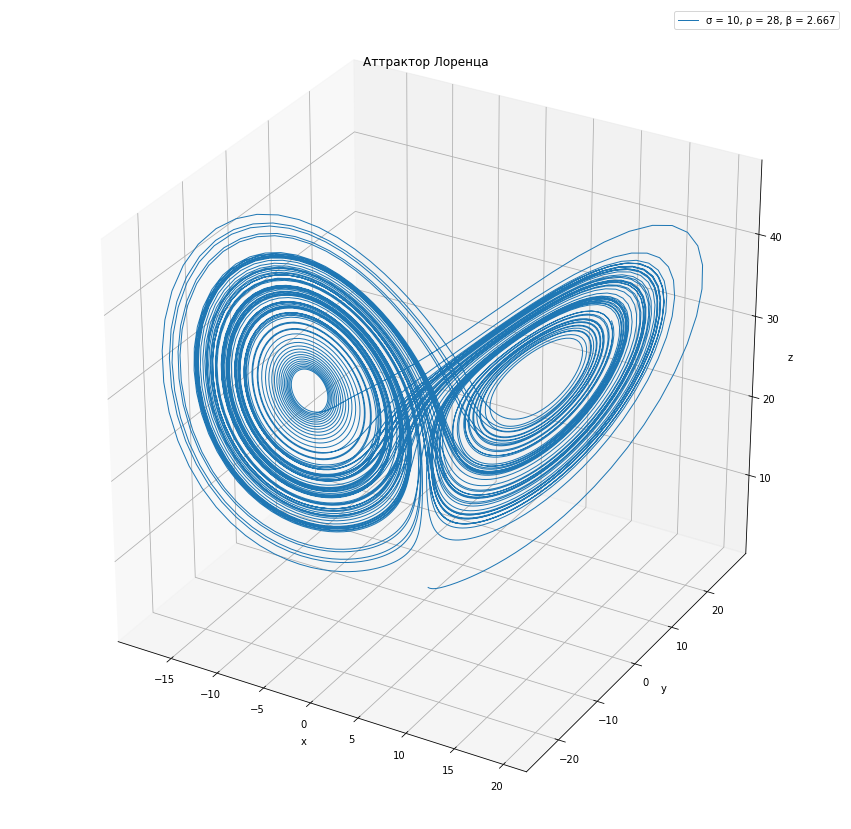

In [9]:
from scipy.integrate import odeint

def lorenz(X, t, sigma, beta, rho):
    x, y, z = X
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

interval = 100
steps = 10 ** 4

sigma, rho, beta = 10, 28, 2.667
x0, y0, z0 = 0., 1., 1.01

t = np.linspace(0, interval, steps)
f = odeint(lorenz, (x0, y0, z0), t, args = (sigma, beta, rho))
x, y, z = f.T

fig = matplotlib.pyplot.figure(figsize = (15, 15))
plot = fig.gca(projection = '3d')

plot.plot(x, y, z, lw = 1)
plot.set_title("Аттрактор Лоренца")
plot.legend(['\u03C3 = 10, \u03C1 = 28, \u03B2 = 2.667'])
plot.set_xlabel("x")
plot.set_ylabel("y")
plot.set_zlabel("z")

matplotlib.pyplot.show();

## Задача №6

- сгенерируйте список чисел от 1 до произвольного числа $n$ от 5 до 9 включительно
- сделайте из него массив numpy
- сгенерируйте случайное число $m$ от 2 до 4 включительно
- верните массив numpy в следующей формы: $[1, 0, ..., 0, 2, 0, ..., 0, 3, ... , n, 0, ... , 0]$, где количество нулей между числами равно $m$
- преобразуйте полученный массив в двумерный массив так, чтобы в первом столбце были числа $1,2, ... , n$, остальные - $0$

In [3]:
from random import randint
import numpy as np

def get_array(n, m):
    result = np.array(list(range(1, n+1)))

    for i in range(n):
        result = np.insert(result, i * m + i + 1, [0] * m)
    return result

In [4]:
n = randint(5, 9)
m = randint(2, 4)

array = get_array(n, m).reshape(n, m+1)
array

array([[1, 0, 0, 0],
       [2, 0, 0, 0],
       [3, 0, 0, 0],
       [4, 0, 0, 0],
       [5, 0, 0, 0],
       [6, 0, 0, 0],
       [7, 0, 0, 0],
       [8, 0, 0, 0],
       [9, 0, 0, 0]])